## **Importing necessary Libraries**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
print(f"Dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns")

Dataset has 10000 rows and 14 columns


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
dataset.isnull().sum().sum()

0

**Seperating Independent and Dependent features**

In [ ]:
X = dataset.iloc[:, 3:13]
Y = dataset.iloc[:, 13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


**Feature Engineering**

In [ ]:
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

**Dropping Geography and Gender columns from the dataset**

In [ ]:
X = X.drop(['Geography', 'Gender'], axis = 1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
## concatenate geography and gender

X = pd.concat([X,geography,gender], axis = 1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [ ]:
X = X.astype(int)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0,1,1,1,101348,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,0
2,502,42,8,159660,3,1,0,113931,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0


**Train and Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state =0)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

### **ANN IMPLEMENTATION**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential() #initializing

model.add(Dense(units=11, activation='relu')) #input layer
model.add(Dense(units=64, activation='relu')) # first hidden layer
model.add(Dense(units=32, activation='relu')) #second hidden layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'])



In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
## Early stopping

import tensorflow as tf


early_stopping= tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history = model.fit(X_train, y_train, validation_split = 0.33, batch_size=10, epochs = 1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8058 - loss: 0.4637 - val_accuracy: 0.8410 - val_loss: 0.3795
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8457 - loss: 0.3631 - val_accuracy: 0.8410 - val_loss: 0.3912
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8629 - loss: 0.3443 - val_accuracy: 0.8501 - val_loss: 0.3708
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8598 - loss: 0.3481 - val_accuracy: 0.8413 - val_loss: 0.3803
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8488 - loss: 0.3488 - val_accuracy: 0.8493 - val_loss: 0.3683
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8527 - loss: 0.3477 - val_accuracy: 0.8584 - val_loss: 0.3660
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8634 - loss: 0.3285 - val_accuracy: 0.8482 - val_loss: 0.3677
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8542 - loss: 0.3435 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

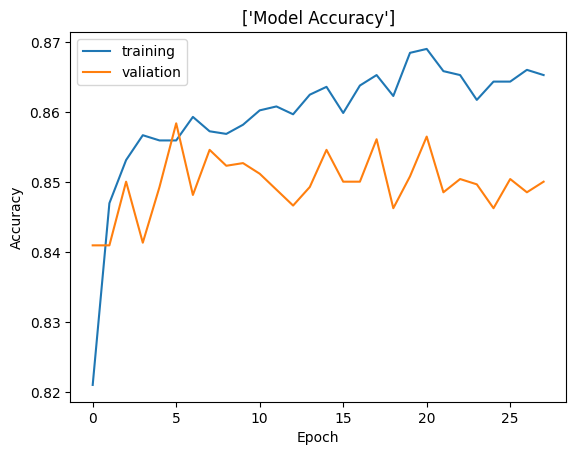

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title(['Model Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['training', 'valiation'], loc ='upper left')
plt.show()

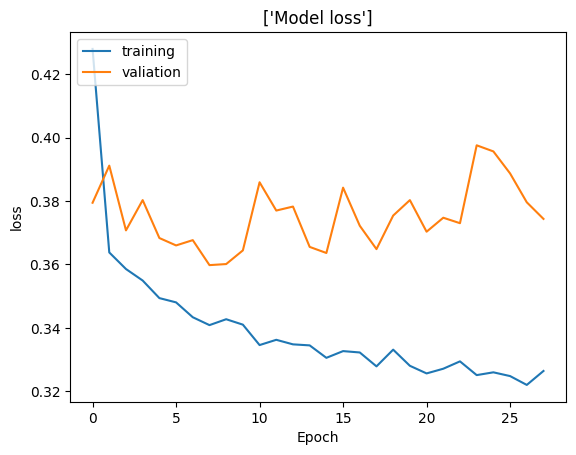

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title(['Model loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['training', 'valiation'], loc ='upper left')
plt.show()

## **Making predictions and Evaluating the model**

In [ ]:
# predicting the test set results

y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
## Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[1548,   47],
       [ 243,  162]])

In [ ]:
## Accuracy

from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
score

0.855

In [ ]:
## get the weights

model.get_weights()

[array([[-0.45692196, -0.11801824, -0.06878172,  0.09414884,  0.83054805,
          0.9773313 ,  0.14350796,  0.46901637, -0.10856517, -0.6350722 ,
          1.9446721 ],
        [-2.3359554 ,  1.2017176 ,  2.1066234 , -1.9126624 , -0.9264504 ,
          0.8411504 ,  1.3768352 , -1.5638852 ,  1.0201471 , -0.7888133 ,
         -1.3061104 ],
        [-0.4353289 , -0.22059505, -0.02305511,  0.34135732,  0.69976664,
          1.4103227 , -0.17160277,  0.468548  , -0.29739887, -0.21719629,
          0.20054798],
        [ 0.12895477, -1.0012995 ,  0.09789164, -0.33098513,  0.9994882 ,
         -1.3814185 ,  0.1382923 , -1.7428454 ,  1.227399  , -1.6455714 ,
         -0.35201994],
        [-1.4621863 , -3.246135  ,  0.04184813, -0.24879669, -0.8581564 ,
          0.418125  , -2.079599  ,  0.9519394 ,  2.4724305 ,  0.08842664,
         -0.27576163],
        [ 0.15765277,  0.15713611,  0.23741627, -0.00580089,  1.0122056 ,
         -0.6060796 , -0.43608776, -0.70608634, -0.03400227, -0.0583625

## **Saving the Trained model**

In [ ]:
from joblib import dump

dump(model, 'customer_retention_model.joblib')
print("Model saved successfully!")

Model saved successfully!


## **Loading the Saved Model and Making Predictions**

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained Keras model
loaded_model = load_model('customer_retention_model.h5')

# Function to take dynamic user input for the features
def get_user_input():
    print("Please enter the following features:")
    # Create a list to store the inputs for all 11 features
    features = []

    # Prompt the user for 11 feature values
    for i in range(1, 12):
        feature_value = input(f"Feature {i}: ")
        try:
            feature_value = float(feature_value)
            features.append(feature_value)
        except ValueError:
            print("Please enter a valid number.")
            return None

    return np.array(features).reshape(1, -1)

# Get the user input data
new_customer_data = get_user_input()

if new_customer_data is not None:
    #  Predict the probability of retention (model output)
    predicted_probabilities = loaded_model.predict(new_customer_data)
    print("Predicted probabilities of retention:", predicted_probabilities)


    if predicted_probabilities[0] > 0.5:
        print("Customer will churn.")
    else:
        print("Customer will not churn.")

Please enter the following features:
Feature 1: 1
Feature 2: 0.5
Feature 3: 1.2
Feature 4: 1
Feature 5: 0
Feature 6: 1.08
Feature 7: 0.3
Feature 8: 0.55
Feature 9: 0.111
Feature 10: 0.23
Feature 11: 1.7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted probabilities of retention: [[0.00386109]]
Customer will not churn.
